# Import

In [1]:
import os
import numpy as np
import pandas as pd
import spacy

import matplotlib.pyplot as plt
import seaborn as sns

sns.set
%matplotlib inline

# Load the dataset

Head
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
_____________________________________________________________________________
Shape
(10000, 2)
_____________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
review       10000 non-null object
sentiment    10000 non-null object
dtypes: object(2)
memory usage: 156.4+ KB
None


,review,sentiment
count,10000,10000
unique,9983,2
top,"So, I'm wondering while watching this film, di...",positive
freq,2,5028


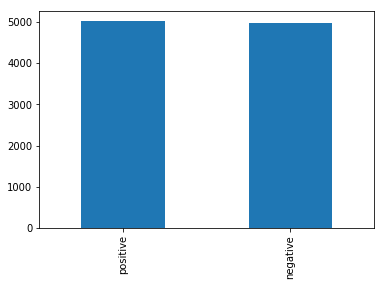

In [2]:
imdb_data=pd.read_csv('IMDBDataset.csv')

df_train=imdb_data[:10000]

print("Head")
print(df_train.head())
print("_____________________________________________________________________________")
print("Shape")
print(df_train.shape)
print("_____________________________________________________________________________")
print(df_train.info())

df_train['sentiment'].value_counts().plot(kind='bar');
df_train.describe()

The data is clean, there is no Naan values

# Preprocessing

## Tokenizing

Creation of a tokenize's function permitting to automatically tokenize our train and test set

In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def tokenize(data):
    corpus = [word_tokenize(token) for token in data]
    lowercase_train = [[token.lower() for token in doc] for doc in corpus]
    alphas = [[token for token in doc if token.isalpha()] for doc in lowercase_train]
    stop_words = stopwords.words('english')
    train_no_stop = [[token for token in doc if token not in stop_words] for doc in alphas]
    stemmer = PorterStemmer()
    stemmed = [[stemmer.stem(token) for token in doc] for doc in train_no_stop]
    train_clean_str = [ ' '.join(doc) for doc in stemmed]
    return train_clean_str

In [4]:
X_train=imdb_data.review[:3000]
y_train=imdb_data.sentiment[:3000]

X_train = tokenize(X_train)

X_test2=imdb_data.review[40000:45000]
y_test2=imdb_data.sentiment[40000:45000]

X_test2 = tokenize(X_test2)
y_test2 = y_test2.values.tolist()

X_train[1]

'wonder littl product br br film techniqu fashion give comfort sometim discomfort sens realism entir piec br br actor extrem well michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrificli written perform piec master product one great master comedi life br br realism realli come home littl thing fantasi guard rather use tradit techniqu remain solid disappear play knowledg sens particularli scene concern orton halliwel set particularli flat halliwel mural decor everi surfac terribl well done'

# Machine Learning

## Preprocessing

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer(stop_words='english')

## Machine learning models

### MultinomialNB

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
pipe = Pipeline([('vectorizer', cvec), ('mnb', mnb)])

y_train=y_train.values.tolist()
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_train)

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report


cm = confusion_matrix(y_train, y_pred)
accuracy = accuracy_score(y_pred, y_train)

cv = cross_val_score(pipe, X_train, y_train, scoring='f1_macro', cv=5, ).mean()
cr = classification_report(y_train, y_pred)
print(cm)
print("Accuracy :" , accuracy)
print(cr, cv)

[[1475   17]
 [ 116 1392]]
Accuracy : 0.9556666666666667
              precision    recall  f1-score   support

    negative       0.93      0.99      0.96      1492
    positive       0.99      0.92      0.95      1508

   micro avg       0.96      0.96      0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000
 0.816719799055966


# Semi Supervised 

In [8]:
iterasi=1
acc_train=[]
acc_test=[]
acc_test2=[]

seed=1.10
data_total=len(X_train)
data_iter=int(seed*data_total)

In [9]:

print(data_total)
print(data_iter)


y_pred_fromtrain=pipe.predict(X_train)
cv = cross_val_score(pipe, X_train, y_train, scoring='f1_macro', cv=5, ).mean()
cr = classification_report(y_pred_fromtrain, y_train)
cm = confusion_matrix(y_train, y_pred_fromtrain)
accuracy = accuracy_score(y_pred_fromtrain, y_train)
acc_train.append(accuracy)
print("\nTrain Data=",len(X_train),len(y_train))
print("Predicton from train data model ke-",iterasi)
print("\nCross validation score:",cv,"\n",cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")


X_test=imdb_data.review[data_total:data_iter]
y_test=imdb_data.sentiment[data_total:data_iter]

pipe.fit(X_train,y_train)

print("Train Data=",len(X_train),len(y_train))
print("Test Data=",len(X_test),len(y_test))

y_test=y_test.values.tolist()
X_test=tokenize(X_test)
y_pred=pipe.predict(X_test)

cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_pred, y_test)
acc_test.append(accuracy)
print("prediction from test data, model ke-",iterasi)
print(cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")

y_pred_fromtest2=pipe.predict(X_test2)
cr = classification_report(y_test2, y_pred_fromtest2)
cm = confusion_matrix(y_test2, y_pred_fromtest2)
accuracy = accuracy_score(y_pred_fromtest2, y_test2)
acc_test2.append(accuracy)
print("prediction from test data, model ke-",iterasi)
print(cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")





iterasi=iterasi+1


prob=pipe.predict_proba(X_test)

for data in range (0,len(X_test)) :

    if (prob[data][0]) > 0.999999 :
        X=X_test[data]
        y=y_pred[data]
        X_train.append(X)
        y_train.append('negative')
    if (prob[data][1]) > 0.999999 :
        X=X_test[data]
        y=y_pred[data]
        X_train.append(X)
        y_train.append('positive')
    elif (prob[data][0]) < 0.9 :
        X=X_test[data]
        y=y_pred[data]
        X_train.append(X)
        y_train.append('positive')
    elif (prob[data][1]) < 0.9 :
        X=X_test[data]
        y=y_pred[data]
        X_train.append(X)
        y_train.append('negative')
        
    

print(len(X_train),len(y_train))

data_total=data_iter
data_iter=int(seed*data_total)

3000
3300

Train Data= 3000 3000
Predicton from train data model ke- 1

Cross validation score: 0.816719799055966 
               precision    recall  f1-score   support

    negative       0.99      0.93      0.96      1591
    positive       0.92      0.99      0.95      1409

   micro avg       0.96      0.96      0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000


Confusion Matrix : 
 [[1475   17]
 [ 116 1392]]
Accuracy : 0.9556666666666667
__________________________________________________________________________________________________
Train Data= 3000 3000
Test Data= 300 300
prediction from test data, model ke- 1
              precision    recall  f1-score   support

    negative       0.83      0.86      0.84       155
    positive       0.84      0.81      0.82       145

   micro avg       0.83      0.83      0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83    

In [10]:
while data_total < 10000 :

    print(data_total,data_iter,len(X_train))


    y_pred_fromtrain=pipe.predict(X_train)
    cv = cross_val_score(pipe, X_train, y_train, scoring='f1_macro', cv=5, ).mean()
    cr = classification_report(y_pred_fromtrain, y_train)
    cm = confusion_matrix(y_train, y_pred_fromtrain)
    accuracy = accuracy_score(y_pred_fromtrain, y_train)
    acc_train.append(accuracy)
    print("\nTrain Data=",len(X_train),len(y_train))
    print("Predicton from train data model ke-",iterasi)
    print("\nCross validation score:",cv,"\n",cr)
    print("\nConfusion Matrix : \n",cm)
    print("Accuracy :" , accuracy)
    print("__________________________________________________________________________________________________")


    X_test=imdb_data.review[data_total:data_iter]
    y_test=imdb_data.sentiment[data_total:data_iter]

    pipe.fit(X_train,y_train)

    print("Train Data=",len(X_train),len(y_train))
    print("Test Data=",len(X_test),len(y_test))

    y_test=y_test.values.tolist()
    X_test=tokenize(X_test)
    y_pred=pipe.predict(X_test)

    cr = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_pred, y_test)
    acc_test.append(accuracy)
    print("prediction from test data, model ke-",iterasi)
    print(cr)
    print("\nConfusion Matrix : \n",cm)
    print("Accuracy :" , accuracy)
    print("__________________________________________________________________________________________________")
    
    y_pred_fromtest2=pipe.predict(X_test2)
    cr = classification_report(y_test2, y_pred_fromtest2)
    cm = confusion_matrix(y_test2, y_pred_fromtest2)
    accuracy = accuracy_score(y_pred_fromtest2, y_test2)
    acc_test2.append(accuracy)
    print("prediction from test data, model ke-",iterasi)
    print(cr)
    print("\nConfusion Matrix : \n",cm)
    print("Accuracy :" , accuracy)
    print("__________________________________________________________________________________________________")





    iterasi=iterasi+1


    prob=pipe.predict_proba(X_test)

    for data in range (0,len(X_test)) :
         if (data_total+data) < 10000:
                
                if (prob[data][0]) > 0.999999 :
                    X=X_test[data]
                    y=y_pred[data]
                    X_train.append(X)
                    y_train.append('negative')
                if (prob[data][1]) > 0.999999 :
                    X=X_test[data]
                    y=y_pred[data]
                    X_train.append(X)
                    y_train.append('positive')
                elif (prob[data][0]) < 0.9 :
                    X=X_test[data]
                    y=y_pred[data]
                    X_train.append(X)
                    y_train.append('positive')
                elif (prob[data][1]) < 0.9 :
                    X=X_test[data]
                    y=y_pred[data]
                    X_train.append(X)
                    y_train.append('negative')


            


    print(len(X_train),len(y_train))
    
    data_total=data_iter
    data_iter=int(seed*data_total)

3300 3630 3362

Train Data= 3362 3362
Predicton from train data model ke- 2

Cross validation score: 0.8338656193284786 
               precision    recall  f1-score   support

    negative       0.99      0.93      0.96      1814
    positive       0.92      0.99      0.95      1548

   micro avg       0.95      0.95      0.95      3362
   macro avg       0.95      0.96      0.95      3362
weighted avg       0.96      0.95      0.95      3362


Confusion Matrix : 
 [[1679   17]
 [ 135 1531]]
Accuracy : 0.9547888161808448
__________________________________________________________________________________________________
Train Data= 3362 3362
Test Data= 330 330
prediction from test data, model ke- 2
              precision    recall  f1-score   support

    negative       0.78      0.88      0.83       166
    positive       0.86      0.76      0.81       164

   micro avg       0.82      0.82      0.82       330
   macro avg       0.82      0.82      0.82       330
weighted avg       0.

prediction from test data, model ke- 6
              precision    recall  f1-score   support

    negative       0.78      0.82      0.79      2463
    positive       0.81      0.77      0.79      2537

   micro avg       0.79      0.79      0.79      5000
   macro avg       0.79      0.79      0.79      5000
weighted avg       0.79      0.79      0.79      5000


Confusion Matrix : 
 [[2008  455]
 [ 582 1955]]
Accuracy : 0.7926
__________________________________________________________________________________________________
5838 5838
5314 5845 5838

Train Data= 5838 5838
Predicton from train data model ke- 7

Cross validation score: 0.8632669763767595 
               precision    recall  f1-score   support

    negative       0.98      0.93      0.95      3308
    positive       0.91      0.97      0.94      2530

   micro avg       0.95      0.95      0.95      5838
   macro avg       0.94      0.95      0.95      5838
weighted avg       0.95      0.95      0.95      5838


Confusio

prediction from test data, model ke- 11
              precision    recall  f1-score   support

    negative       0.73      0.78      0.76       368
    positive       0.79      0.75      0.77       409

   micro avg       0.76      0.76      0.76       777
   macro avg       0.76      0.76      0.76       777
weighted avg       0.76      0.76      0.76       777


Confusion Matrix : 
 [[287  81]
 [104 305]]
Accuracy : 0.7619047619047619
__________________________________________________________________________________________________
prediction from test data, model ke- 11
              precision    recall  f1-score   support

    negative       0.77      0.80      0.78      2463
    positive       0.80      0.77      0.78      2537

   micro avg       0.78      0.78      0.78      5000
   macro avg       0.78      0.78      0.78      5000
weighted avg       0.78      0.78      0.78      5000


Confusion Matrix : 
 [[1968  495]
 [ 585 1952]]
Accuracy : 0.784
__________________________

In [11]:
print("Fnal Model")

pipe.fit(X_train,y_train)

y_pred_fromtest2=pipe.predict(X_test2)
cr = classification_report(y_test2, y_pred_fromtest2)
cm = confusion_matrix(y_test2, y_pred_fromtest2)
accuracy = accuracy_score(y_pred_fromtest2, y_test2)
acc_test2.append(accuracy)
print("prediction from test data, model ke-",iterasi)
print(cr)
print("\nConfusion Matrix : \n",cm)
print("Accuracy :" , accuracy)
print("__________________________________________________________________________________________________")





len(X_train)

Fnal Model
prediction from test data, model ke- 14
              precision    recall  f1-score   support

    negative       0.77      0.78      0.77      2463
    positive       0.78      0.77      0.78      2537

   micro avg       0.77      0.77      0.77      5000
   macro avg       0.77      0.77      0.77      5000
weighted avg       0.77      0.77      0.77      5000


Confusion Matrix : 
 [[1918  545]
 [ 586 1951]]
Accuracy : 0.7738
__________________________________________________________________________________________________


11581

# Test

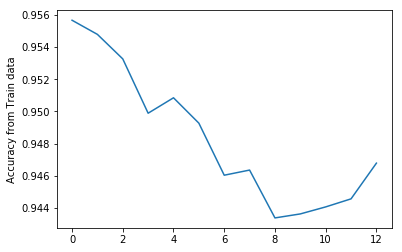

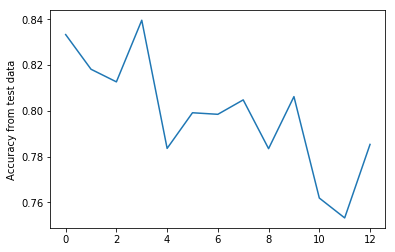

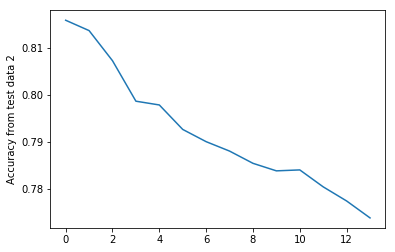

In [12]:
plt.plot(acc_train)
plt.ylabel('Accuracy from Train data')
plt.show()

plt.plot(acc_test)
plt.ylabel('Accuracy from test data')
plt.show()

plt.plot(acc_test2)
plt.ylabel('Accuracy from test data 2')
plt.show()

In [13]:
len(X_train)

11581